In [1]:
import sound
import scipy
from scipy.io import wavfile
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
#import librosa
audiofile = "Track16.wav"

font = {'family' : 'normal',
        'weight' : 'bold',
        'size': 16}
plt.rc('font', **font)


## Task1

In [2]:
fs, data = wavfile.read(audiofile)

In [3]:
fs

16000

In [4]:
data.shape

(447573, 2)

In [5]:
sound.sound(data, fs) 

Stereo


In [38]:
def extract_8_seconds_from_the_middle(data, fs): # extract 8 seconds from the middle
    duration = data.shape[0] / fs
    time_fragment = [duration/2 - 4, duration/2 + 4]
    samples_fragment = data[int(time_fragment[0]*fs):int(time_fragment[1]*fs)]
    return time_fragment, samples_fragment
def normalise_to_1(samples_fragment):
    max_value = (np.max(np.abs(samples_fragment)))
    #min_value = float(samples_fragment.min())
    samples_fragment_norm = (samples_fragment ) / (max_value) 
    return samples_fragment_norm

In [39]:
time_fragment, samples_fragment = extract_8_seconds_from_the_middle(data, fs)
samples_fragment_norm = normalise_to_1(samples_fragment)

In [40]:
# normalise to 1
print(samples_fragment.dtype, samples_fragment.shape)
max_value = float(samples_fragment.max())
min_value = float(samples_fragment.min())
print(max_value, min_value)

int16 (128000, 2)
23259.0 -19869.0


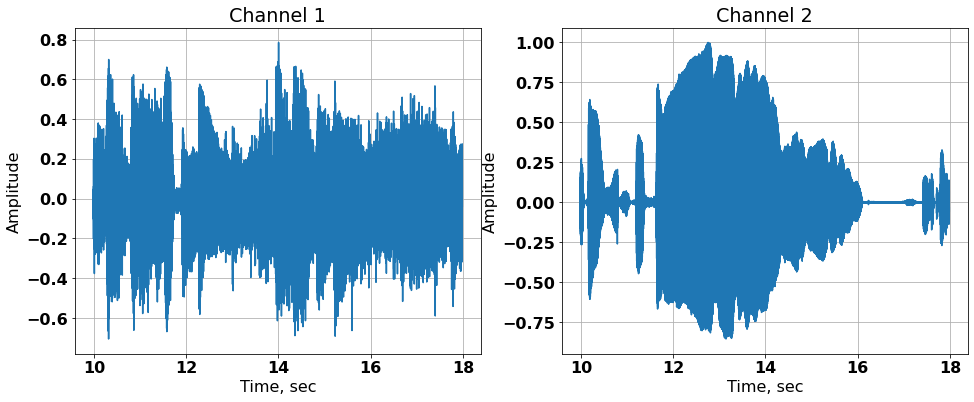

In [41]:
# plot both channels separately
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot(121)
ax.plot(np.linspace(*time_fragment, samples_fragment_norm.shape[0]), samples_fragment_norm[:, 0])
ax.grid()
plt.xlabel("Time, sec")
plt.ylabel("Amplitude")
plt.title("Channel 1")

ax = fig.add_subplot(122)
ax.plot(np.linspace(*time_fragment, samples_fragment_norm.shape[0]), samples_fragment_norm[:, 1])
plt.xlabel("Time, sec")
plt.ylabel("Amplitude")
ax.grid()
plt.title("Channel 2")

plt.show()

## Task 2

In [44]:
N = 10
blocks = np.array(data[:N*1024, 0])
blocks = blocks.reshape((N, 1024))
#for i in range()
fft_blocks = np.fft.fft(blocks)
fft_blocks = np.fft.fftshift(fft_blocks)
fft_blocks.shape

(10, 1024)

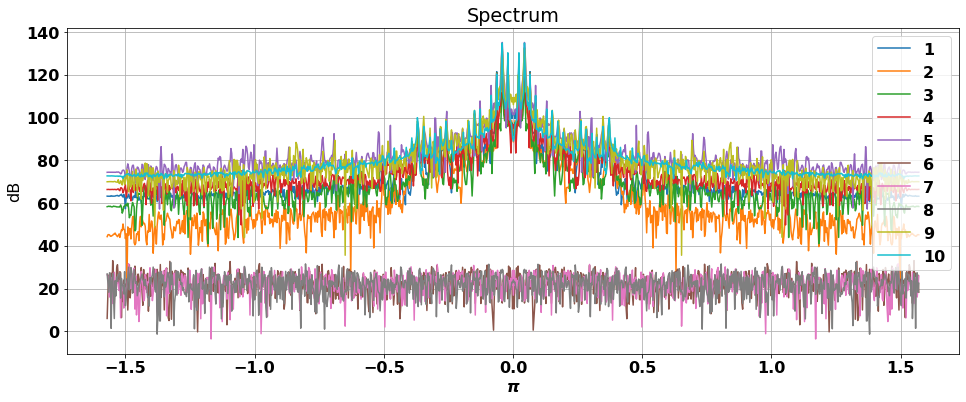

In [45]:
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot()
for i in range(N):
    ax.plot(np.linspace(-np.pi/2, np.pi/2, 1024), 20*np.log10(np.abs(fft_blocks[i])))
    
plt.legend(list(range(1, N+1)))
plt.xlabel('$\pi$')
plt.ylabel('dB')
plt.title('Spectrum')
plt.grid()
plt.show()

## Task 4

In [81]:
import pickle

audiofile = "Track16.wav"
binfile = "encoded8bit.bin"
decoded = "decoded8bit.wav"
rate = 16000

d = pickle.load(open(binfile, "rb"), encoding='int8')
idx, step_size = d[0], d[1]
data8bit = idx * step_size

In [84]:
data8bit.shape, data.shape

((447573, 2), (447573, 2))

In [85]:
data8bit_norm = normalise_to_1(data8bit[:, 0])
data_norm = normalise_to_1(data[:, 0])

In [77]:
data8bit_norm.max()

0.9921875

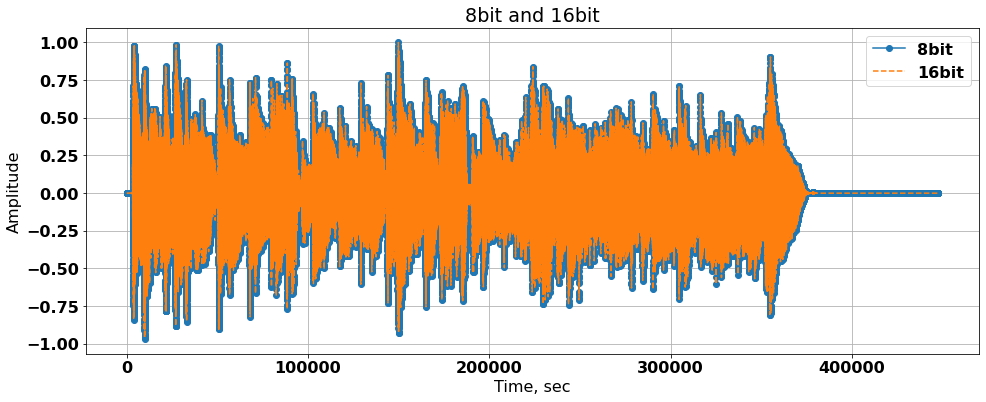

In [86]:
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot()
ax.plot((data8bit_norm), '-o')
ax.plot(data_norm, '--')
ax.grid()
plt.xlabel("Time, sec")
plt.ylabel("Amplitude")
plt.title("8bit and 16bit")
plt.legend(["8bit", "16bit"])
plt.show()

In [72]:
fs8bit, data8bit = wavfile.read("decoded8bit.wav")

time_fragment8bit, samples_fragment8bit = extract_8_seconds_from_the_middle(data8bit, fs8bit)
samples_fragment_norm8bit = normalise_to_1(samples_fragment8bit)


In [54]:
samples_fragment_norm8bit.min()

0.0

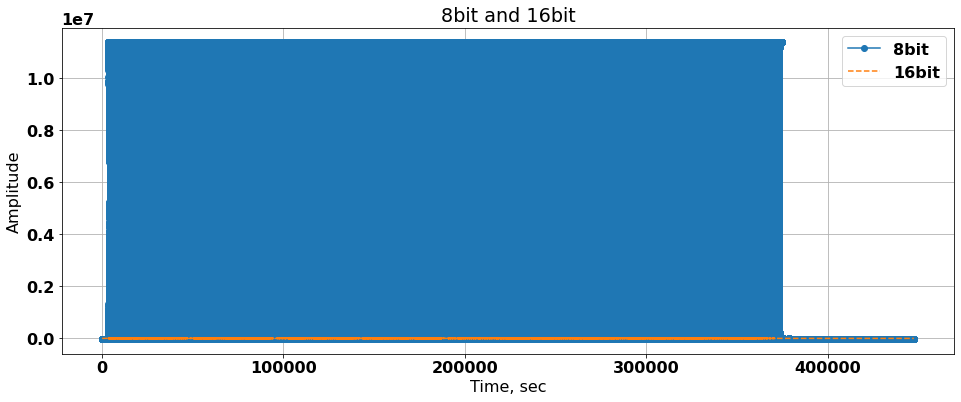

In [62]:
# plot 1 channel of initial Track16.wav and decoded8bit.wav
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot()
ax.plot((data8bit[:, 0] - 0.5), '-o')
ax.plot(data[:, 0], '--')
ax.grid()
plt.xlabel("Time, sec")
plt.ylabel("Amplitude")
plt.title("8bit and 16bit")
plt.legend(["8bit", "16bit"])
plt.show()

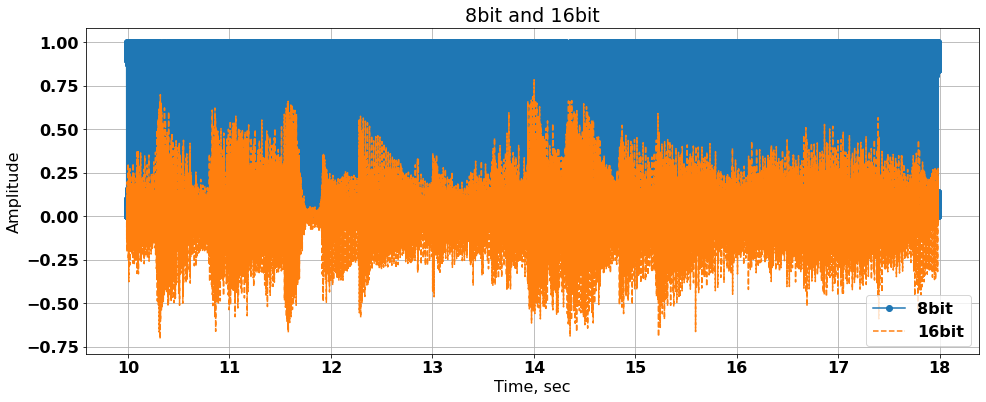

In [55]:
# plot 1 channel of initial Track16.wav and decoded8bit.wav
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot()
ax.plot(np.linspace(*time_fragment8bit, samples_fragment_norm8bit.shape[0]), samples_fragment_norm8bit[:, 0], '-o')
ax.plot(np.linspace(*time_fragment, samples_fragment_norm.shape[0]), samples_fragment_norm[:, 0], '--')
ax.grid()
plt.xlabel("Time, sec")
plt.ylabel("Amplitude")
plt.title("8bit and 16bit")
plt.legend(["8bit", "16bit"])
plt.show()

In [27]:
sound.sound(data8bit, fs) 

Stereo


In [65]:
import os

print(os.path.getsize("./encoded.bin") / 1024)
print(os.path.getsize("./Track16.wav") / 1024)
print(os.path.getsize("./encoded8bit.bin") / 1024)
print(os.path.getsize("./decoded8bit.wav") / 1024)

2476.5400390625
1748.375
1164.5302734375
874.208984375
